# Inferential Statistics Ia - Frequentism

## Learning objectives

Welcome to the first Frequentist inference mini-project! Over the course of working on this mini-project and the next frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

## Prerequisites

For working through this notebook, you are expected to have a very basic understanding of:
* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

While it's great if you have previous knowledge about sampling distributions, this assignment will introduce the concept and set you up to practice working using sampling distributions. This notebook was designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. The second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

For this notebook, we will use data sampled from a known normal distribution. This allows us to compare our results with theoretical expectations.

## I An introduction to sampling from the Normal distribution

First, let's explore the ways we can generate the Normal distribution. While there's a fair amount of interest in [sklearn](https://scikit-learn.org/stable/) within the machine learning community, you're likely to have heard of [scipy](https://docs.scipy.org/doc/scipy-0.15.1/reference/index.html) if you're coming from the sciences. For this assignment, you'll use [scipy.stats](https://docs.scipy.org/doc/scipy-0.15.1/reference/tutorial/stats.html) to complete your work.

In [1]:
from scipy.stats import norm
from scipy.stats import t
import numpy as np
import pandas as pd
from numpy.random import seed
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

__Q:__ Call up the documentation for the `norm` function imported above. What is the second listed method?

__A:__ By selecting SHIFT + TAB on the word 'norm' in the cell, I can find...<br>
pdf(x, loc=0, scale=1)<br>
 Probability density function.<br>
The second method listed is the PROBABILITY DENSITY FUNCTION.

Use the method that generates random variates to draw five samples from the standard normal distribution.

In [2]:
np.random.seed(47)
# draw five samples here
sample = np.random.normal(size=5)
print(sample)

[-0.84800948  1.30590636  0.92420797  0.6404118  -1.05473698]


__Q:__ What is the mean of this sample? Is it exactly equal to the value you expected? Hint: the sample was drawn from the standard normal distribution.

In [3]:
# Calculate and print the mean here, hint: use np.mean()
sample_mean = np.mean(sample)
sample_mean

0.19355593334131074

__A:__ The sample is too small to accurately estimate the mean of a standard normal distribution, which is 0.

__Q:__ What is the standard deviation of these numbers? Calculate this manually here as $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}$. Hint: np.sqrt() and np.sum() will be useful here and remember that numpy supports [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html).

In [4]:
# standard distribution for our sample
sample_std = np.sqrt(np.sum((sample - sample_mean)**2)/len(sample))
sample_std

0.9606195639478641

Here we have calculated the actual standard deviation of a small (size 5) data set. But in this case, this small data set is actually a sample from our larger (infinite) population. In this case, the population is infinite because we could keep drawing our normal random variates until our computers die. In general, the sample mean we calculate will not be equal to the population mean (as we saw above). A consequence of this is that the sum of squares of the deviations from the _population_ mean will be bigger than the sum of squares of the deviations from the _sample_ mean. In other words, the sum of squares of the deviations from the _sample_ mean is too small to give an unbiased estimate of the _population_ variance. An example of this effect is given [here](https://en.wikipedia.org/wiki/Bessel%27s_correction#Source_of_bias). Scaling our estimate of the variance by the factor $n/(n-1)$ gives an unbiased estimator of the population variance. This factor is known as [Bessel's correction](https://en.wikipedia.org/wiki/Bessel%27s_correction). The consequence of this is that the $n$ in the denominator is replaced by $n-1$.

__Q:__ If all we had to go on was our five samples, what would be our best estimate of the population standard deviation? Use Bessel's correction ($n-1$ in the denominator), thus $\sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}}$.

In [5]:
# best estimate for standard distribution for the population
pop_std = np.sqrt(np.sum((sample - sample_mean)**2)/(len(sample) - 1))
pop_std

1.0740053227518152

This is closer to the standard deviation of the standard normal distribution, which is 1.

__Q:__ Now use numpy's std function to calculate the standard deviation of our random samples. Which of the above standard deviations did it return?

In [6]:
# standard deviation of sample using numpy
numpy_std = np.std(sample)
numpy_std

0.9606195639478641

__A:__ This returns the first method for computing the standard deviation that does not use Bessel's correction.

Consult the documentation for np.std() to see how to apply the correction for estimating the population parameter and verify this produces the expected result.

Consulting the documentation, it reads...<br>
In standard statistical practice, ``ddof=1`` provides an unbiased estimator of the variance of the infinite population.<br>
This is the delta degree of freedom to use.

In [7]:
numpy_std_bessel = np.std(sample, ddof=1)
numpy_std_bessel

1.0740053227518152

This is the same value that was calculated by brute force.

### Summary of section

In this section, you've been introduced to the scipy.stats package and used it to draw a small sample from the standard normal distribution. You've calculated the average (the mean) of this sample and seen that this is not exactly equal to the expected population parameter (which we know because we're generating the random variates from a specific, known distribution). You've been introduced to two ways of calculating the standard deviation; one uses $n$ in the denominator and the other uses $n-1$ (Bessel's correction). You've also seen which of these calculations np.std() performs by default and how to get it to generate the other.

You use $n$ as the denominator if you want to calculate the standard deviation of a sequence of numbers. You use $n-1$ if you are using this sequence of numbers to estimate the population parameter. This brings us to some terminology that can be a little confusing.

The population parameter is traditionally written as $\sigma$ and the sample statistic as $s$. Rather unhelpfully, $s$ is also called the sample standard deviation (using $n-1$) whereas the standard deviation of the sample uses $n$. That's right, we have the sample standard deviation and the standard deviation of the sample and they're not the same thing!

The sample standard deviation
\begin{equation}
s = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n-1}} \approx \sigma,
\end{equation}
is our best (unbiased) estimate of the population parameter ($\sigma$).

If your data set _is_ your entire population, you simply want to calculate the population parameter, $\sigma$, via
\begin{equation}
\sigma = \sqrt{\frac{\sum_i(x_i - \bar{x})^2}{n}}
\end{equation}
as you have complete, full knowledge of your population. In other words, your sample _is_ your population. It's worth noting at this point if your sample is your population then you know absolutely everything about your population, there are no probabilities really to calculate and no inference to be done.

If, however, you have sampled _from_ your population, you only have partial knowledge of the state of your population and the standard deviation of your sample is not an unbiased estimate of the standard deviation of the population, in which case you seek to estimate that population parameter via the sample standard deviation, which uses the $n-1$ denominator.

You're now firmly in frequentist theory territory. Great work so far! Now let's dive deeper.

## II Sampling distributions

So far we've been dealing with the concept of taking a sample from a population to infer the population parameters. One statistic we calculated for a sample was the mean. As our samples will be expected to vary from one draw to another, so will our sample statistics. If we were to perform repeat draws of size $n$ and calculate the mean of each, we would expect to obtain a distribution of values. This is the sampling distribution of the mean. The Central Limit Theorem (CLT) tells us that such a distribution will approach a normal distribution as $n$ increases. For the sampling distribution of the mean, the standard deviation of this distribution is given by

\begin{equation}
\sigma_{mean} = \frac{\sigma}{\sqrt n}
\end{equation}

where $\sigma_{mean}$ is the standard deviation of the sampling distribution of the mean and $\sigma$ is the standard deviation of the population (the population parameter).

This is important because typically we are dealing with samples from populations and all we know about the population is what we see in the sample. From this sample, we want to make inferences about the population. We may do this, for example, by looking at the histogram of the values and by calculating the mean and standard deviation (as estimates of the population parameters), and so we are intrinsically interested in how these quantities vary across samples. In other words, now that we've taken one sample of size $n$ and made some claims about the general population, what if we were to take another sample of size $n$? Would we get the same result? Would we make the same claims about the general population? This brings us to a fundamental question: _when we make some inference about a population based on our sample, how confident can we be that we've got it 'right'?_

Let's give our normal distribution a little flavor. Also, for didactic purposes, the standard normal distribution, with its variance equal to its standard deviation of one, would not be a great illustration of a key point. Let us imagine we live in a town of 50000 people and we know the height of everyone in this town. We will have 50000 numbers that tell us everything about our population. We'll simulate these numbers now and put ourselves in one particular town, called 'town 47', where the population mean height is 172 cm and population standard deviation is 5 cm.

In [8]:
seed(47)
pop_heights = norm.rvs(172, 5, size=50000)

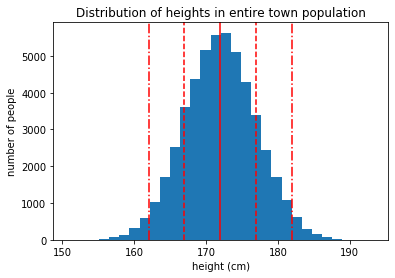

In [9]:
_ = plt.hist(pop_heights, bins=30)
_ = plt.xlabel('height (cm)')
_ = plt.ylabel('number of people')
_ = plt.title('Distribution of heights in entire town population')
_ = plt.axvline(172, color='r')
_ = plt.axvline(172+5, color='r', linestyle='--')
_ = plt.axvline(172-5, color='r', linestyle='--')
_ = plt.axvline(172+10, color='r', linestyle='-.')
_ = plt.axvline(172-10, color='r', linestyle='-.')

Now, 50000 people is rather a lot to chase after with a tape measure. If all you want to know is the average height of the townsfolk, then can you just go out and measure a sample to get a pretty good estimate of the average height?

In [10]:
def townsfolk_sampler(n):
    return np.random.choice(pop_heights, n)

Let's say you go out one day and randomly sample 10 people to measure.

In [11]:
seed(47)
daily_sample1 = townsfolk_sampler(10)

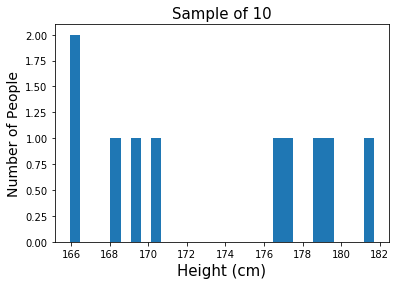

In [12]:
_ = plt.hist(daily_sample1, bins=30)
_ = plt.xlabel('Height (cm)', fontsize=15)
_ = plt.ylabel('Number of People', fontsize=14)
_ = plt.title('Sample of 10', fontsize=15)

The sample distribution doesn't look much like what we know (but wouldn't know in real-life) the population distribution looks like. What do we get for the mean?

In [13]:
daily_sample1_mean = np.mean(daily_sample1)
daily_sample1_mean

173.47911444163503

And if we went out and repeated this experiment?

In [14]:
daily_sample2 = townsfolk_sampler(10)

In [15]:
daily_sample2_mean = np.mean(daily_sample2)
daily_sample2_mean

173.7317666636263

Simulate performing this random trial every day for a year, calculating the mean of each daily sample of 10, and plot the resultant sampling distribution of the mean.

In [16]:
np.random.seed(47)
# take your samples here
means_list = []
for i in range(365):
    daily_sample_year = townsfolk_sampler(10)
    daily_mean = np.mean(daily_sample_year)
    means_list.append(daily_mean)

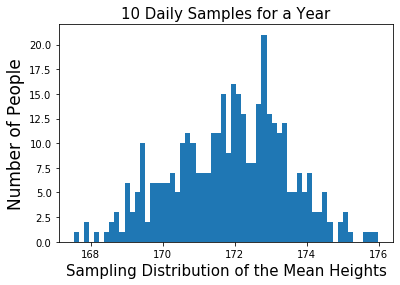

In [17]:
_ = plt.hist(means_list, bins=60)
_ = plt.xlabel('Sampling Distribution of the Mean Heights', fontsize=15)
_ = plt.ylabel('Number of People', fontsize=17)
_ = plt.title('10 Daily Samples for a Year', fontsize=15)

The above is the distribution of the means of samples of size 10 taken from our population. The Central Limit Theorem tells us the expected mean of this distribution will be equal to the population mean, and standard deviation will be $\sigma / \sqrt n$, which, in this case, should be approximately 1.58.

Verify the above results from the CLT.

In [18]:
# mean of distribution of means for sample size 10
sample_mean10 = np.mean(means_list)
sample_mean10

171.8660049358649

In [19]:
# relative delta as a percentage of population mean
delta_mean10 = abs(sample_mean10 - 172)/172 * 100
delta_mean10

0.0779041070552863

This is within 0.08% of the population mean of 172.

In [20]:
# standard deviation of distribution of means for sample size 10
sample_std10 = np.std(means_list, ddof=1)
sample_std10

1.5778333114768472

In [21]:
# expected standard deviation of sampling distribution of the mean as n approaches population size
large_sample_std = np.std(pop_heights)/np.sqrt(10)
large_sample_std

1.5782419116544761

In [22]:
# relative delta as a percentage of large sample limit standard deviation
delta_std10 = abs(sample_std10 - large_sample_std)/large_sample_std * 100
delta_std10

0.025889578436081192

This is within 0.03% of the standard deviation of the population.

Remember, in this instance, we knew our population parameters, that the average height really is 172 cm and the standard deviation is 5 cm, and we see some of our daily estimates of the population mean were as low as around 168 and some as high as 176.

__Q:__ Repeat the above year's worth of samples but for a sample size of 50 (perhaps you had a bigger budget for conducting surveys that year!) Would you expect your distribution of sample means to be wider (more variable) or narrower (more consistent)? Compare your resultant summary statistics to those predicted by the CLT.

__A:__ The population standard deviation is divided by the square root of the sample size to get the standard deviation of sampling distribution of the mean. Thus as the sample size increases, the standard deviation of sampling distribution of the mean decreases.<br>
The standard deviation of sampling distribution of the mean would be narrower.

In [23]:
np.random.seed(47)
# calculate daily means from the larger sample size here
means_list50 = []
for i in range(365):
    daily_sample_year = townsfolk_sampler(50)
    daily_mean = np.mean(daily_sample_year)
    means_list50.append(daily_mean)

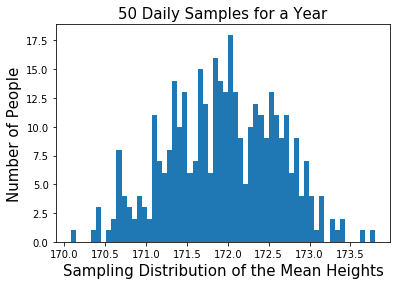

In [24]:
plt.hist(means_list50, bins=60);
plt.xlabel('Sampling Distribution of the Mean Heights', fontsize=15);
plt.ylabel('Number of People', fontsize=15);
plt.title('50 Daily Samples for a Year', fontsize=15);

In [25]:
# mean of distribution of means for sample size 50
sample_mean50 = np.mean(means_list50)
sample_mean50

171.94366080916114

In [26]:
# relative delta as a percentage of population mean
delta_mean50 = abs(sample_mean50 - 172)/172 * 100
delta_mean50

0.03275534351096238

This is within 0.04% of the population mean, a narrower distribution.

In [27]:
# standard deviation of distribution of means for sample size 50
sample_std50 = np.std(means_list50, ddof=1)
sample_std50

0.6745354088447525

In [28]:
# expected standard deviation of sampling distribution of the mean as n approaches population size
large_sample_std50 = np.std(pop_heights)/np.sqrt(50)
large_sample_std50

0.7058112398797253

In [29]:
# relative delta as a percentage of large sample limit standard deviation
delta_std50 = abs(sample_std50 - large_sample_std50)/large_sample_std50 * 100
delta_std50

4.431189143474447

This is within 5% of the population standard deviation.

While not as accurate for estimating the population standard deviation,<br>the larger sample size yields less variation when estimating the population mean.

### III Normally testing times!

All of the above is well and good. We've been sampling from a population we know is normally distributed, we've come to understand when to use $n$ and when to use $n-1$ in the denominator to calculate the spread of a distribution, and we've  seen the Central Limit Theorem in action for a sampling distribution. All seems very well behaved in Frequentist land. But, well, why should we really care?

Remember, we rarely (if ever) actually know our population parameters but you still have to estimate them somehow. If we want to make inferences such as "is this observation unusual?" or "has my population mean changed?" then you need to have some idea of what the underlying distribution is so you can calculate relevant probabilities. In frequentist inference, you use the formulas above to deduce these population parameters. Take a moment in the next part of this assignment to refresh your understanding of how these probabilities work.

Recall some basic properties of the standard Normal distribution, such as about 68% of observations being within plus or minus 1 standard deviation of the mean.

Using this fact, calculate the probability of observing the value 1 or less in a single observation from the standard normal distribution. Hint: you may find it helpful to sketch the standard normal distribution (the familiar bell shape) and mark the number of standard deviations from the mean on the x-axis and shade the regions of the curve that contain certain percentages of the population.

In [30]:
# make function that plots standard normal distribution for visual reference
def snd_plot(mu=0, sigma=1, title='Standard Normal Distribution', x_label='x', filled=True):
    """Plots standard normal distribution taking mean, standard deviation, title, and color fill parameters"""
    
    # set axes boundaries
    x_min = mu - 3 * sigma
    x_max = mu + 3 * sigma
    y_min = 0
    y_max = (np.sqrt(2 * np.pi) * sigma) ** -1
    
    # plot function and add vertical mean line
    x = np.linspace(x_min, x_max, 100)
    y = norm.pdf(x, mu, sigma)
    plt.plot(x, y, color='black')
    plt.axvline(x=mu, color='black')
    
    # checking if areas need to be filled
    if filled:
        # fill in center area
        x_fill = np.linspace(mu + sigma, mu - sigma, 100)
        y_fill = norm.pdf(x_fill, mu, sigma)
        plt.fill_between(x_fill, y_fill, color='#0b559f', alpha='1.0')

        # fill in right area and add vertical line at 1 standard deviation
        x_fill = np.linspace(mu + sigma, mu + 10 * sigma, 100)
        y_fill = norm.pdf(x_fill, mu, sigma)
        plt.fill_between(x_fill, y_fill, color='#539ecd', alpha='1.0')
        plt.axvline(x=mu + sigma, ymax=np.e ** (-0.5), color='black')

        # fill in left area and add vertical line at -1 standard deviation
        x_fill = np.linspace(mu - 10 * sigma, mu - sigma, 100)
        y_fill = norm.pdf(x_fill, mu, sigma)
        plt.fill_between(x_fill, y_fill, color='#539ecd', alpha='1.0')
        plt.axvline(x=mu - sigma, ymax=np.e ** (-0.5), color='black')

        # add legend identifying areas by percent
        middle_patch = mpatches.Patch(color='#0b559f', label='68%')
        edge_patch = mpatches.Patch(color='#539ecd', label='16% each')
        plt.legend(handles=[middle_patch, edge_patch])
    
    plt.grid()

    plt.title(title, fontsize=14)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel('Density of Probability', fontsize=14)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.show()

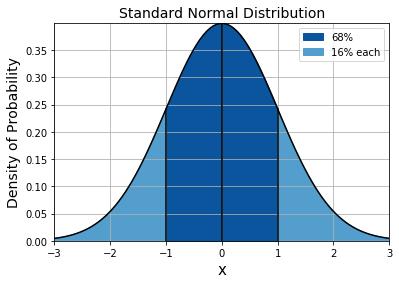

In [31]:
# plot standard normal distribution
snd_plot()

Assume the area under the curve between -1 and 1 is 68%.<br>
The total of the two remaining areas will be 100 - 68 = 32%.<br>
The areas below -1 and above 1 are equal, because the curve is symmetric.<br>
Each remaining area is 32 / 2 = 16%<br>
The total area below 1 is 68 + 16 = 84%<br>
Therefore, the probability of observing a value of 1 or less is 0.84.

Calculating this probability involved calculating the area under the pdf from the value of 1 and below. To put it another way, we need to integrate the pdf. We could just add together the known areas of chunks (from -Inf to 0 and then 0 to $+\sigma$ in the example above. One way to do this is using look up tables (literally). Fortunately, scipy has this functionality built in with the cdf() function.

Use the cdf() function to answer the question above again and verify you get the same answer.

In [32]:
prob_below1 = norm.cdf(1)
prob_below1

0.8413447460685429

This true probability is slightly higher.<br>
This is understanable, since 68% was only an estimate for the area under the curve between -1 and 1.

__Q:__ Using our knowledge of the population parameters for our townsfolk's heights, what is the probability of selecting one person at random and their height being 177 cm or less? Calculate this using both of the approaches given above.

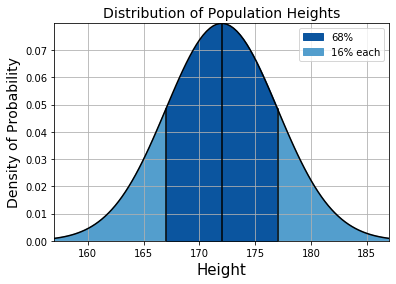

In [33]:
# plot distribution of population heights
snd_plot(172, 5, 'Distribution of Population Heights', 'Height')

In [34]:
prob_below177 = norm.cdf(177, loc=172, scale=5)
prob_below177

0.8413447460685429

__A:__ Since 177cm is one standard deviation (5cm) above the mean (172),<br>
we get the same probability as before, 0.84.

__Q:__ Turning this question around. Let's say we randomly pick one person and measure their height and find they are 2.00 m tall? How surprised should we be at this result, given what we know about the population distribution? In other words, how likely would it be to obtain a value at least as extreme as this? Express this as a probability.

In [35]:
# probability of sampling one person and getting this height
prob_above200 = 1 - norm.cdf(200, loc=172, scale=5)
prob_above200

1.0717590259723409e-08

In [36]:
# sample size needed to find one person at this height
sample_needed200 = prob_above200 ** -1
sample_needed200

93304555.94649756

__A:__ The odds are greater than 1 in 93 million. Not very likely.

We could calculate this probability by virtue of knowing the population parameters. We were then able to use the known properties of the relevant normal distribution to calculate the probability of observing a value at least as extreme as our test value. We have essentially just performed a z-test (albeit without having prespecified a threshold for our "level of surprise")!

We're about to come to a pinch, though here. We've said a couple of times that we rarely, if ever, know the true population parameters; we have to estimate them from our sample and we cannot even begin to estimate the standard deviation from a single observation. This is very true and usually we have sample sizes larger than one. This means we can calculate the mean of the sample as our best estimate of the population mean and the standard deviation as our best estimate of the population standard deviation. In other words, we are now coming to deal with the sampling distributions we mentioned above as we are generally concerned with the properties of the sample means we obtain.

Above, we highlighted one result from the CLT, whereby the sampling distribution (of the mean) becomes narrower and narrower with the square root of the sample size. We remind ourselves that another result from the CLT is that _even if the underlying population distribution is not normal, the sampling distribution will tend to become normal with sufficiently large sample size_. This is the key driver for us 'requiring' a certain sample size, for example you may frequently see a minimum sample size of 30 stated in many places. In reality this is simply a rule of thumb; if the underlying distribution is approximately normal then your sampling distribution will already be pretty normal, but if the underlying distribution is heavily skewed then you'd want to increase your sample size.

__Q:__ Let's now start from the position of knowing nothing about the heights of people in our town.
* Use our favorite random seed of 47, to randomly sample the heights of 50 townsfolk
* Estimate the population mean using np.mean
* Estimate the population standard deviation using np.std (remember which denominator to use!)
* Calculate the (95%) [margin of error](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/hypothesis-testing/margin-of-error/#WhatMofE) (use the exact critial z value to 2 decimal places - [look this up](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/find-critical-values/) or use norm.ppf())
* Calculate the 95% Confidence Interval of the mean
* Does this interval include the true population mean?

In [37]:
np.random.seed(47)
# take sample
sample50 = townsfolk_sampler(50)
print(sample50)

[179.04949004 168.54189384 181.71974048 176.56433733 165.91968052
 170.65629646 179.37664509 166.40103988 177.15105034 169.41097044
 169.96353026 175.15960886 177.08203296 175.57499516 174.54290109
 172.47967099 168.61822612 174.73274884 170.88926244 178.27468993
 171.52874629 173.48970606 172.0752456  172.29707499 171.58202648
 169.84480352 178.67104246 174.28346436 174.29645483 167.42082214
 168.57939161 169.54392578 167.58621293 176.8657094  164.25755366
 177.38929575 171.97964488 164.94136054 177.90675289 175.2758845
 176.64336688 169.68013675 175.41851966 171.9408919  179.69843965
 169.93651872 169.3320981  172.17010876 171.18783138 171.14370134]


In [38]:
# estimate of population mean
sample50_mean = np.mean(sample50)
sample50_mean

172.7815108576788

In [39]:
# estimate of population standard deviation
sample50_std = np.std(sample50, ddof=1)
sample50_std

4.195424364433547

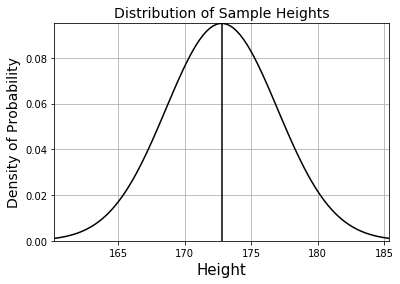

In [40]:
# plot distribution of sample heights
snd_plot(sample50_mean, sample50_std, 'Distribution of Sample Heights', 'Height', False)

The $\alpha$ level is 100% minus the confidence level (95%).&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; $\alpha$ = 100% - 95% = 5%<br>
Dividing by 2 gives the percent area under one tail.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5% / 2 = 2.5%<br>
Convert this percentage to a decimal.&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2.5 * 100 = 0.025<br>
Subtracting this from 1 gives the area to the left of the one tail.&nbsp;&nbsp; 1 - 0.025 = 0.975

In [41]:
# calculate the alpha decimal value for 2-tailed test
alpha = 100 - 95
alpha_div2 = alpha / 2
alpha_decimal = alpha_div2 / 100
q = 1 - alpha_decimal
q

0.975

Use q to determine the z-value from the norm.ppf function.

In [42]:
z_value = norm.ppf(q)
z_value

1.959963984540054

The standard error of the mean is the population standard deviation divided by the square root of the sample size.<br>
Note that we are estimating the population standard deviation, since it is unknown.

In [43]:
sample50_sem = sample50_std /np.sqrt(sample50.size)
sample50_sem

0.5933226036092445

The margin of error is the product of the z-value and the strandard error of the mean.

In [44]:
moe95 = z_value * sample50_sem
moe95

1.1628909342876539

The confidence interval of the mean is found by taking the sample mean<br>
and offsetting it on each side by the margin of error.

In [45]:
ci = (sample50_mean - moe95, sample50_mean + moe95)
print('The 95% confidence interval of the mean is ({}, {}).'.format(format(ci[0], '.2f'), (format(ci[1], '.2f'))))

The 95% confidence interval of the mean is (171.62, 173.94).


In [46]:
# confirm this with the .interval() method
left, right = norm.interval(0.95, loc=sample50_mean, scale=sample50_sem)
print('({}, {})'.format(format(left, '.2f'), (format(right, '.2f'))))

(171.62, 173.94)


__A:__ This interval includes the true population mean of 172 cm.

__Q:__ Above we calculated the confidence interval using the critical z value. What is the problem with this? What requirement, or requirements, are we (strictly) failing?

__A:__ When using the z-value, we must know the population standard deviation.<br>
Here, we only know the standard deviation for our sample.<br>
Because of this, we should be using the t-value instead of the z-value.

__Q:__ Calculate the 95% confidence interval for the mean using the _t_ distribution. Is this wider or narrower than that based on the normal distribution above? If you're unsure, you may find this [resource](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/confidence-interval/) useful. For calculating the critical value, remember how you could calculate this for the normal distribution using norm.ppf().

The degrees of freedom is one less than the sample size.

In [47]:
df = sample50.size - 1
df

49

Use q to determine the t-value from the t.ppf function.

In [48]:
t_value = t.ppf(q, df)
t_value

2.009575234489209

The margin of error is now the product of the t-value and the strandard error of the mean.

In [49]:
moe95_t = t_value * sample50_sem
moe95_t

1.1923264102757953

The confidence interval of the mean for the new critical value can be found like before.

In [50]:
ci_t = (sample50_mean - moe95_t, sample50_mean + moe95_t)
print('The 95% confidence interval of the mean using the t-value is ({}, {}).'
      .format(format(ci_t[0], '.2f'), (format(ci_t[1], '.2f'))))

The 95% confidence interval of the mean using the t-value is (171.59, 173.97).


In [51]:
# Confirming with the .interval method
left, right = t.interval(0.95, 49, loc=sample50_mean, scale=sample50_sem)
print('({}, {})'.format(format(left, '.2f'), (format(right, '.2f'))))

(171.59, 173.97)


This interval still includes the true population mean of 172 cm.

__A:__ This is slightly wider than the previous confidence interval. This reflects the greater uncertainty given that we are estimating population parameters from a sample.

## Learning outcomes

Having completed this project notebook, you now have hands-on experience:
* sampling and calculating probabilities from a normal distribution
* the correct way to estimate the standard deviation of a population (the population parameter) from a sample
* what a sampling distribution is and how the Central Limit Theorem applies
* how to calculate critical values and confidence intervals